In [1]:
# 45 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 선형 회귀모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 잔차의 정규성 확인 :qqplot, 회귀분석의 상수항 추가 : add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from sklearn.metrics import r2_score
# 가설검정 및 통계 분석 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols

# 작업 디렉터리를 설정
import os
os.chdir('/home/piai')

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rc('axes', unicode_minus=False)

## 1. DIABETES 데이터 셋

### 1. DIABETE 데이터셋 용어 정리

-Y (당뇨 발병 확률점수): 당뇨병 발병 확률을 나타내는 지표이다. 


-AGE (나이): 당뇨병 발병 위험이 나이와 함께 증가하는 경향이 있다. 나이가 많을수록 당뇨병 발병 위험이 높아지며, 이는 신체의 대사 활동이 감소하고 인슐린 저항성이 증가하기 때문이다.


-GENDER (성별): 성별은 당뇨병 발병 위험에 영향을 미칠 수 있다. 여성은 일반적으로 남성보다 당뇨병에 더 취약한 경향이 있습니다. 이는 여성의 호르몬 수준과 대사 활동의 차이 때문이다.


-BMI (체질량지수): 체질량지수는 체중을 신장의 제곱으로 나눈 값으로, 비만의 정도를 평가하는 지표다. BMI가 높을수록 당뇨병 발병 위험이 높아지는 경향이 있습니다. 고체지방량은 인슐린 저항성을 증가시키고 당뇨병 발병을 촉진할 수 있다.


-BP (평균 혈압): 고혈압은 당뇨병 발병 위험 요인 중 하나다. 고혈압은 혈관을 손상시켜 혈압 조절 메커니즘을 악화시키고 당뇨병 합병증의 발생 위험을 높일 수 있다.


-CHOLESTEROL (혈중 총 콜레스테롤): 고 콜레스테롤 수치는 당뇨병 발병 위험을 증가시킬 수 있다. 고 콜레스테롤 수치는 혈관 벽에 콜레스테롤이 침착되어 혈관을 막히게 하고 심혈관 질환의 발병 위험을 높일 수 있다.


-LDL (저밀도 지질단백질): LDL은 혈액 내의 "나쁜" 콜레스테롤로 알려져 있다. LDL 수치가 높을수록 동맥 경화와 혈관 질환의 발생 위험이 증가하며, 이는 당뇨병 환자에게 더 큰 위험을 초래할 수 있다.


-HDL (고밀도 지질단백질): HDL은 혈액 내의 "좋은" 콜레스테롤로 알려져 있다. HDL 수치가 높을수록 혈관 질환의 발생 위험이 낮아지는 경향이 있으며, 이는 당뇨병 환자에게도 유리한 영향을 미칠 수 있다.


-TCH (총 콜레스테롤 수치): 총 콜레스테롤 수치는 혈액 내의 모든 콜레스테롤 양을 나타낸다. 고 총 콜레스테롤 수치는 당뇨병 발병 위험을 증가시킬 수 있다.


-LTG (라모트리진): 라모트리진은 당뇨병 치료에 사용되는 약물 중 하나로, 혈당 조절을 개선하여 당뇨병 합병증의 발생 위험을 감소시킬 수 있다.


-GLUCOSE (혈당 수치): 혈당 수치는 혈액 내의 포도당(당) 농도를 나타낸다. 고 혈당 수치는 인슐린 저항성을 촉진하고 당뇨병 발병 위험을 증가시킬 수 있다.

In [3]:
df_explain = pd.read_excel("./실습파일/실습데이터 설명(Data Dictionary).xlsx").drop(columns=['No', '데이터 품질', 'Discription'])
df_explain[61:72]

,Data,변수,변수.1,변수 역할,변수 형태,변수 설명,척도
61,DIABETES,Y,당뇨 발병확률,목표변수,연속형,당뇨 발병확률,Interval
62,DIABETES,AGE,나이,설명변수,연속형,나이,Interval
63,DIABETES,GENDER,"성별(1-남성,2-여성)",설명변수,연속형,"성별(1-남성,2-여성)",Binary
64,DIABETES,BMI,BMI지수,설명변수,연속형,BMI지수,Interval
65,DIABETES,BP,혈압,설명변수,연속형,혈압,Interval
66,DIABETES,CHOLESTEROL,총 콜레스테롤,설명변수,연속형,총 콜레스테롤,Interval
67,DIABETES,LDL,LDL수치,설명변수,연속형,LDL수치,Interval
68,DIABETES,HDL,HDL수치,설명변수,연속형,HDL수치,Interval
69,DIABETES,TCH,TCH수치,설명변수,연속형,TCH수치,Interval
70,DIABETES,LTG,라모트리진,설명변수,연속형,라모트리진,Interval


In [4]:
df_raw = pd.read_csv("./실습파일/BigData분석/DIABETES.csv")
df_raw

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,75,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,141,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,206,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,135,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...,...
437,178,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,104,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,132,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,220,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


##### 결측치는 존재하지 않는다.

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Y            442 non-null    int64  
 1   AGE          442 non-null    int64  
 2   GENDER       442 non-null    int64  
 3   BMI          442 non-null    float64
 4   BP           442 non-null    float64
 5   CHOLESTEROL  442 non-null    int64  
 6   LDL          442 non-null    float64
 7   HDL          442 non-null    float64
 8   TCH          442 non-null    float64
 9   LTG          442 non-null    float64
 10  GLUCOSE      442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


## 2. 변수 간의 경향성 파악 : 그래프 분석

##### GENDER 변수를 2(여자)를 1로 변환하여, One-hot encoding하였다.

In [6]:
df_raw.loc[df_raw['GENDER'] == 2, ['GENDER']] = 0
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,0,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,0,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


###  2.1 목표변수 y와 각각의 설명변수의 scatter plot & 상관계수 heatmap

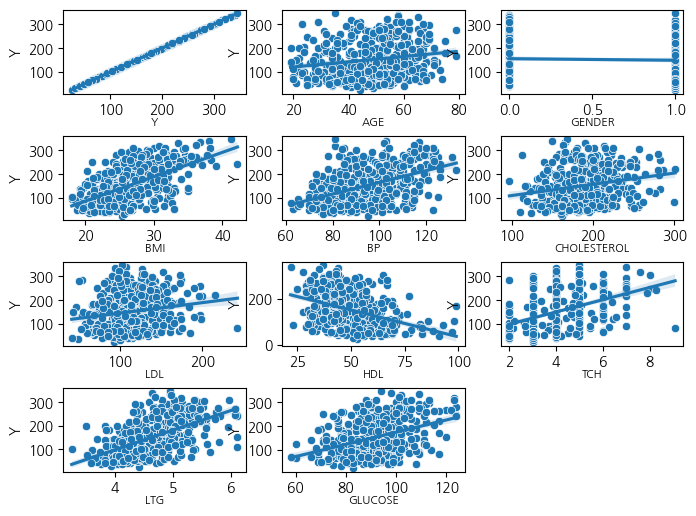

In [7]:
k=1
plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)
for i in df_raw.columns:
    plt.subplot(4,3, k)
    sns.scatterplot(x=df_raw[i], y=df_raw['Y'])
    sns.regplot(x=df_raw[i], y=df_raw['Y'], scatter=False)
    plt.xlabel(i, labelpad=0.5, fontsize=8)
    k+=1
plt.show()

<Axes: >

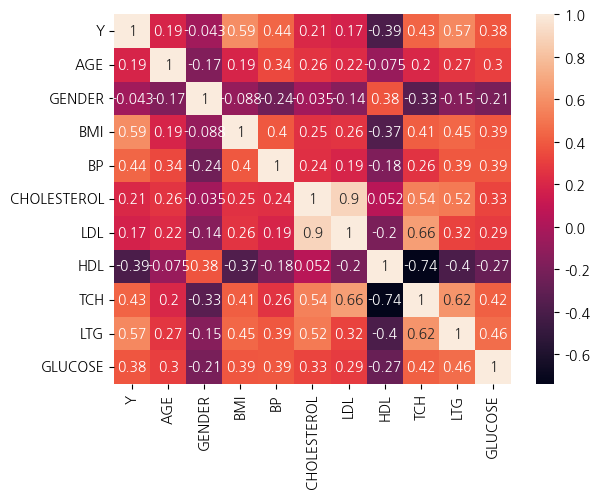

In [8]:
sns.heatmap(df_raw.corr(), annot= True)

##### BMI, BP, HDL, TCH, LTG, GLUCOSE 변수가 Y와 상관성이 있는 것으로 나타났다.  산점도를 통해,  TCH, LDL, CHOLESTEROL은 이상치가 있는 것으로 보아, 추가적인 박스플롯과 산점도를 통해 이상치 제거 여부를 판단하겠다.

##### Y와 TCH의 산점도

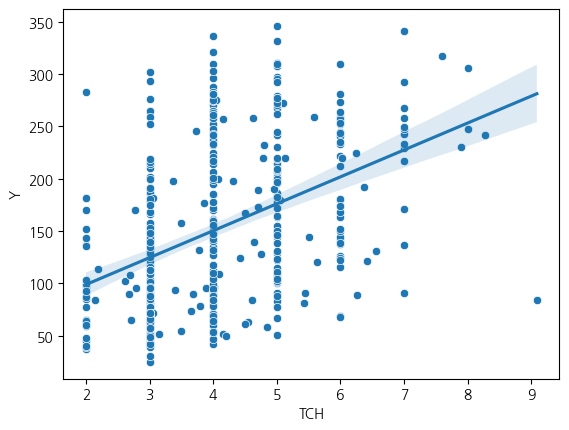

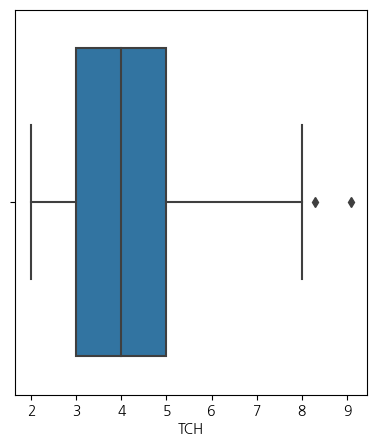

In [9]:
sns.scatterplot(x=df_raw['TCH'], y=df_raw['Y'])
sns.regplot(x=df_raw['TCH'], y=df_raw['Y'], scatter=False)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1,2,2)
sns.boxplot(x=df_raw['TCH'])
plt.show()

##### 큰 TCH값을 가지며, 회귀직선을 크게 벗어나는 인덱스 123번 , 정상범주이지만, 회귀직선을 크게 벗어나는 인덱스 29번 데이터를 삭제하였다.

In [10]:
df_raw.sort_values(by = 'TCH', ascending = False).head(1)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
123,84,50,0,29.6,94.33,300,242.4,33.0,9.09,4.8122,109


In [11]:
df_raw.loc[df_raw['TCH'] == 2.00].sort_values('LTG', ascending = False).head(1)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
29,283,67,0,25.8,113.0,158,54.2,64.0,2.0,5.2933,104


In [12]:
df_preprocessing = df_raw.drop(index = [123, 29]).reset_index(drop=True)

In [13]:
df_preprocessing.shape

(440, 11)

##### Y와 LDL의 산점도

##### 낮은 LDL 값임에도, 큰 Y값을 가져 회귀직선을 크게 벗어나는 인덱스 403번 데이터를 제거하였다.

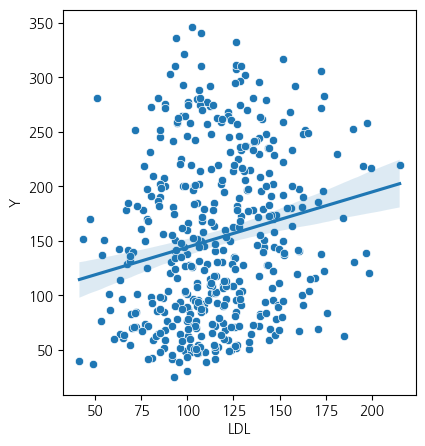

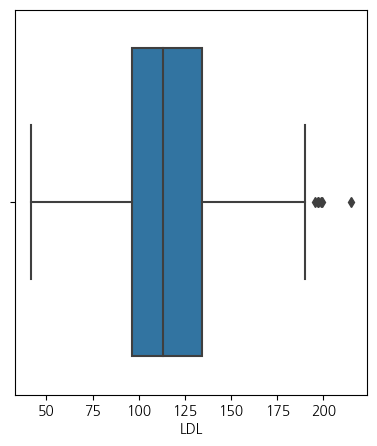

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(x=df_preprocessing['LDL'], y=df_preprocessing['Y'])
sns.regplot(x=df_preprocessing['LDL'], y=df_preprocessing['Y'], scatter=False)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1,2,2)
sns.boxplot(x=df_preprocessing['LDL'])
plt.show()

In [15]:
df_preprocessing.loc[df_preprocessing['Y']>250].sort_values('LDL').head(1)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
403,281,62,0,37.8,119.0,113,51.0,31.0,4.0,5.0434,84


In [16]:
df_preprocessing = df_preprocessing.drop(index = 403)

##### Y와 CHOLESTEROL

##### 정상범주를 넘어가는 CHOLESTEROL 값이 존재하였으나, 회귀직선을 크게 벗어나지 않아 제거하지않았다.

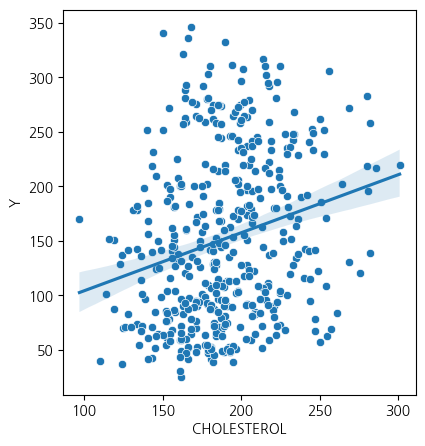

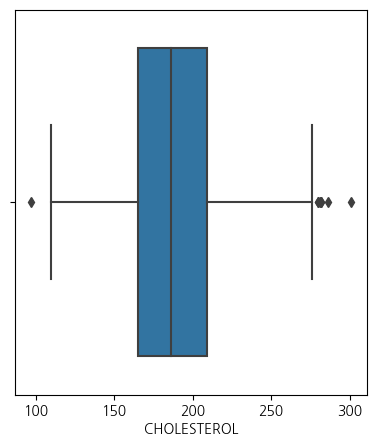

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(x=df_preprocessing['CHOLESTEROL'], y=df_preprocessing['Y'])
sns.regplot(x=df_preprocessing['CHOLESTEROL'], y=df_preprocessing['Y'], scatter=False)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(x=df_preprocessing['CHOLESTEROL'])
plt.show()

##### GENDER에 따른 y의 평균

In [18]:
gender_ymean=df_preprocessing.groupby('GENDER')['Y'].mean()

<Axes: xlabel='GENDER'>

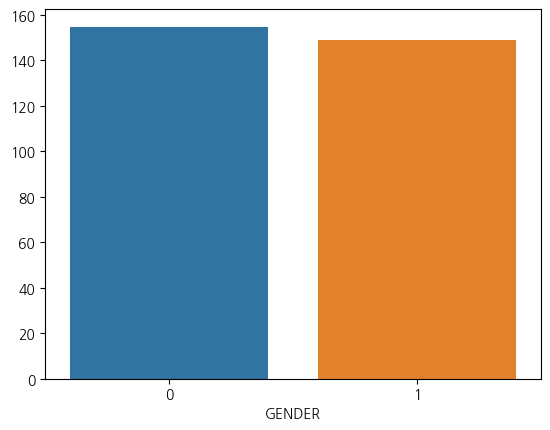

In [19]:
sns.barplot(x=gender_ymean.index, y=gender_ymean.values)

##### GENDER에 따른 Y의 평균차이에 대한 검정

##### -GENDER에 따른Y의 평균차이는 없는 것으로 나타났다.

In [20]:
# 2-Sample t-test
t_result = stats.ttest_ind(df_preprocessing[df_preprocessing['GENDER']==0]['Y'], 
                           df_preprocessing[df_preprocessing['GENDER']==1]['Y'], equal_var = True)

# t값,  p값  
t, p = t_result.statistic, t_result.pvalue

In [21]:
# 2-Sample t-test의 t값 p값 출력
print( " 2-Sample t-test ")
print( "  t검정통계량: {} " .format(t)) ; print( " p-value : {} " .format(p))

 2-Sample t-test 
  t검정통계량: 0.7832845392095806 
 p-value : 0.4338843307485333 


##### Traiing-Test set 분리 = 8:2

In [22]:
df_train, df_test = train_test_split(df_preprocessing, test_size = 0.2, random_state = 990829) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (351, 11)
test data size : (88, 11)


## 3. 회귀모델 생성

##### 3.1 전처리 후 데이터셋(df_preprocessing)을 이용한 회귀모델

In [23]:
reg_model = smf.ols(formula = "Y ~ AGE+ GENDER+ BMI+ BP+ CHOLESTEROL+ LDL+ HDL+ TCH + LTG+ GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     36.47
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           4.21e-48
Time:                        00:06:47   Log-Likelihood:                -1886.6
No. Observations:                 351   AIC:                             3795.
Df Residuals:                     340   BIC:                             3838.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -392.7209     71.295     -5.508      

#####  AGE 제거

In [24]:
reg_model = smf.ols(formula = "Y ~ GENDER+ BMI+ BP+ CHOLESTEROL+ LDL+ HDL+ TCH+LTG+ GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     40.63
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           6.59e-49
Time:                        00:06:47   Log-Likelihood:                -1886.6
No. Observations:                 351   AIC:                             3793.
Df Residuals:                     341   BIC:                             3832.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -392.2197     71.167     -5.511      

##### HDL 제거

In [25]:
reg_model = smf.ols(formula = "Y ~ GENDER+ BMI+ BP+ CHOLESTEROL+ LDL + TCH + LTG + GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     45.74
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.12e-49
Time:                        00:06:47   Log-Likelihood:                -1886.8
No. Observations:                 351   AIC:                             3792.
Df Residuals:                     342   BIC:                             3826.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -354.8098     34.774    -10.203      

##### TCH 제거

In [27]:
reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + CHOLESTEROL + LDL + LTG + GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     52.04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           2.86e-50
Time:                        00:06:54   Log-Likelihood:                -1887.5
No. Observations:                 351   AIC:                             3791.
Df Residuals:                     343   BIC:                             3822.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -373.6728     30.671    -12.183      

##### Omnibus의 p값을 통해 정규성을 만족함을 알수 있고, 더빈 왓슨 통계량이 2에 가까운 1.885를 가지므로 독립성 또한 만족한다.

##### 회귀계수가 유의하지 않은 변수들을 제거하고 난뒤 , 다중공선성을 확인하였을 때 VIF기준 10을 초과하는 변수가 없어 추가적인 변수제거를 하지 않았다.

In [28]:
df_train_x = df_train[["GENDER", "BMI", "BP", "CHOLESTEROL", "LDL", "LTG", "GLUCOSE"]]
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
1,GENDER,1.26
3,BP,1.35
7,GLUCOSE,1.42
2,BMI,1.46
6,LTG,2.39
5,LDL,6.73
4,CHOLESTEROL,8.41
0,const,117.62


##### train data의 결정계수: 0.515
##### test data의 결정계수: 0.495

In [29]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", round(r2_score(df_train['Y'], train_pred),3))
print("test data의 결정계수:", round(r2_score(df_test['Y'], test_pred),3))

train data의 결정계수: 0.515
test data의 결정계수: 0.495


##### 잔차의 가정 확인(등분산성 검정)

- 잔차가 y=0 기준으로 랜덤하게 산포되어 있으므로 등분산성을 만족한다.

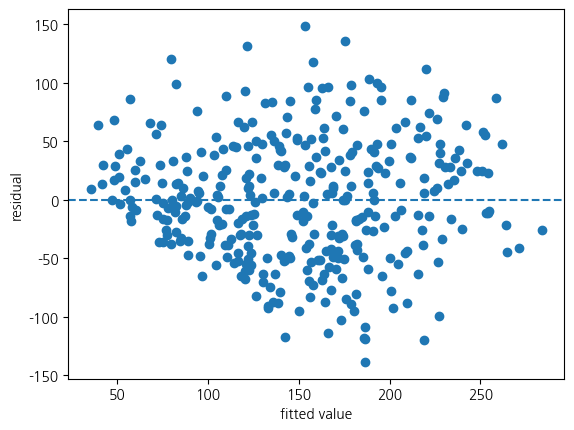

In [30]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

*결론 :  
적합된 회귀식은 다음과 같다,
#####  yhat = -373.6728 + 21.0737*GENDER + 5.2694*BMI + 0.9409*BP - 0.9278*CHOLESTEROL + 0.7672 * LDL + 67.9434*LTG + 0.6199 * GLUCOSE 
1. 다음의 데이터셋의 컬럼을 제거했다. ['AGE', 'HDL', 'TCH']  
2. 그 결과, 수정된 결정계수 값은 0.503 -> 0.515 으로 소폭 상승했다.
3. test set의 수정결정계수 값은 0.495로 나타났다.